## Normalización por lotes con el conjunto de datos MNIST.


### Objetivo de este cuaderno

<h5> 1. Definir varias redes neuronales, la función de criterio y el optimizador.</h5>
<h5> 2. Entrenar la red neuronal utilizando normalización por lotes y sin normalización por lotes.</h5>

In [1]:
# These are the libraries will be used for this lab.

# Using the following line code to install the torchvision library
# !mamba install -y torchvision

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

#### Módulo de Red Neuronal y Función de Entrenamiento


Define el módulo o la clase de la red neuronal.


Módulo de red neuronal con dos capas ocultas utilizando normalización por lotes.


In [2]:
# Define the Neural Network Model using Batch Normalization

class NetBatchNorm(nn.Module):

    # Constructor
    def __init__(self, in_size, n_hidden1, n_hidden2, out_size):
        super(NetBatchNorm, self).__init__()
        self.linear1 = nn.Linear(in_size, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, out_size)
        self.bn1 = nn.BatchNorm1d(n_hidden1)
        self.bn2 = nn.BatchNorm1d(n_hidden2)

    # Prediction
    def forward(self, x):
        x = self.bn1(torch.sigmoid(self.linear1(x)))
        x = self.bn2(torch.sigmoid(self.linear2(x)))
        x = self.linear3(x)
        return x

    # Activations, to analyze results
    def activation(self, x):
        out = []
        z1 = self.bn1(self.linear1(x))
        out.append(z1.detach().numpy().reshape(-1))
        a1 = torch.sigmoid(z1)
        out.append(a1.detach().numpy().reshape(-1).reshape(-1))
        z2 = self.bn2(self.linear2(a1))
        out.append(z2.detach().numpy().reshape(-1))
        a2 = torch.sigmoid(z2)
        out.append(a2.detach().numpy().reshape(-1))
        return out

Módulo de red neuronal con dos capas ocultas sin normalización por lotes.


In [3]:
# Class Net for Neural Network Model

class Net(nn.Module):

    # Constructor
    def __init__(self, in_size, n_hidden1, n_hidden2, out_size):

        super(Net, self).__init__()
        self.linear1 = nn.Linear(in_size, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, out_size)

    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x

    # Activations, to analyze results
    def activation(self, x):
        out = []
        z1 = self.linear1(x)
        out.append(z1.detach().numpy().reshape(-1))
        a1 = torch.sigmoid(z1)
        out.append(a1.detach().numpy().reshape(-1).reshape(-1))
        z2 = self.linear2(a1)
        out.append(z2.detach().numpy().reshape(-1))
        a2 = torch.sigmoid(z2)
        out.append(a2.detach().numpy().reshape(-1))
        return out

Define una función para entrenar el modelo. En este caso, la función devuelve un diccionario de Python para almacenar la pérdida de entrenamiento y la precisión en los datos de validación.


In [4]:
# Define the function to train model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss':[], 'validation_accuracy':[]}

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            model.train()
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())

        correct = 0
        for x, y in validation_loader:
            model.eval()
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label == y).sum().item()

        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)

    return useful_stuff

### Genera algunos datos

Carga el conjunto de datos de entrenamiento estableciendo el parámetro <code>train</code> en <code>True</code> y conviértelo en un tensor colocando un objeto de transformación en el argumento transform.


In [5]:
# load the train dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Carga el conjunto de datos de validación estableciendo el parámetro <code>train</code> en <code>False</code> y conviértelo en un tensor colocando un objeto de transformación en el argumento <code>transform</code>.


In [6]:
# load the train dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Crea el cargador de datos de entrenamiento y el cargador de datos de validación.


In [7]:
# Create Data Loader for both train and validating

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

### Define la red neuronal, la función de criterio, el optimizador y entrena el modelo.


Crea la **función de criterio**.


In [8]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

Variables para la forma de la red neuronal; <code>hidden_dim</code> se usa para el número de neuronas en ambas capas ocultas.


In [9]:
# Set the parameters

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

#### Entrena la **red neuronal** utilizando **normalización por lotes** y **sin normalización por lotes**.


Entrena la **red neuronal** utilizando **normalización por lotes**:


In [10]:
# Create model, optimizer and train the model

model_norm  = NetBatchNorm(input_dim, hidden_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model_norm.parameters(), lr = 0.1)
training_results_Norm=train(model_norm , criterion, train_loader, validation_loader, optimizer, epochs=5)

Entrena la **red neuronal** sin utilizar **normalización por lotes**:

In [11]:
# Create model without Batch Normalization, optimizer and train the model

model = Net(input_dim, hidden_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=5)

### Analísis de resultados

Compara los histogramas de las activaciones de la primera capa para la primera muestra, en ambos modelos.


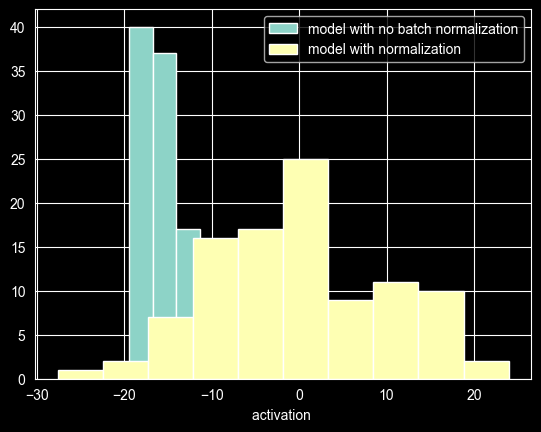

In [12]:
model.eval()
model_norm.eval()
out=model.activation(validation_dataset[0][0].reshape(-1,28*28))
plt.hist(out[2],label='model with no batch normalization' )
out_norm=model_norm.activation(validation_dataset[0][0].reshape(-1,28*28))
plt.hist(out_norm[2],label='model with normalization')
plt.xlabel("activation ")
plt.legend()
plt.show()

Observamos que las activaciones con normalización por lotes están centradas en cero y tienen una varianza menor.

Compara la pérdida de entrenamiento en cada iteración.


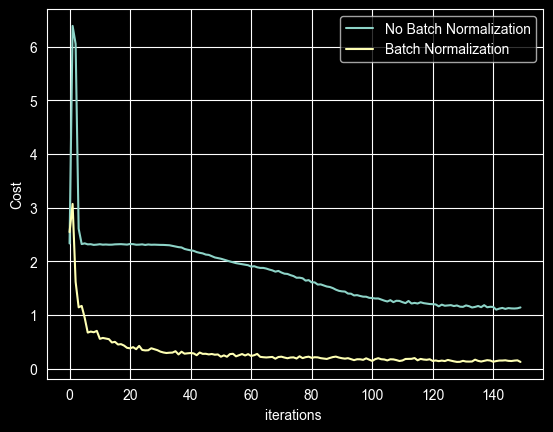

In [13]:
# Plot the diagram to show the loss

plt.plot(training_results['training_loss'], label='No Batch Normalization')
plt.plot(training_results_Norm['training_loss'], label='Batch Normalization')
plt.ylabel('Cost')
plt.xlabel('iterations ')
plt.legend()
plt.show()

Compara la precisión de validación en cada iteración.


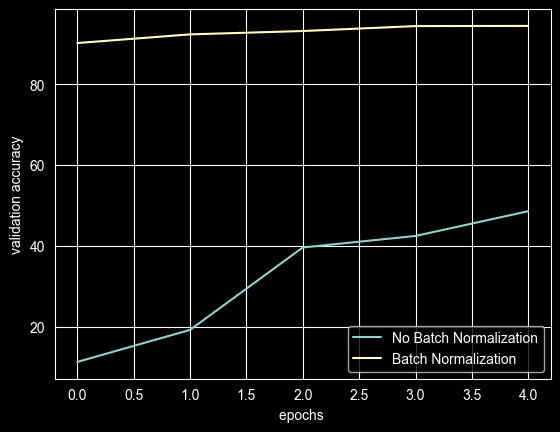

In [14]:
# Plot the diagram to show the accuracy

plt.plot(training_results['validation_accuracy'],label='No Batch Normalization')
plt.plot(training_results_Norm['validation_accuracy'],label='Batch Normalization')
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')
plt.legend()
plt.show()